# Second Exploration

In this notebook, a deeper exploratory data analysis (EDA) will be conducted to uncover intricate relationships among variables and their correlations within the dataset. Building upon the initial exploration, this phase aims to provide insights into how different features interact with each other and influence the target variable. 

Key aspects of this analysis will include:

- Examination of pairwise relationships between variables.
- Assessment of correlations using appropriate statistical methods.
- Visualization of relationships through plots and charts to aid in understanding patterns and trends.

The findings from this analysis will serve as a foundation for subsequent modeling efforts, guiding feature selection and engineering to enhance predictive performance.


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%run ../census_income/utils/pandas_missing_handler.py
%run ../census_income/utils/pandas_explorer.py

## Data load and first visualization:

In [2]:
path = '../census_income/data/cleaned_data.csv'
data = pd.read_csv(path).drop(columns=['Unnamed: 0'])
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
data.income.value_counts().index[1]

' >50K'

## Bivariate Analysis

In the next step, a **bivariate analysis** will be conducted to study the relationship between each of the independent variables and the target variable, `income`. The purpose of this analysis is to discover how the different features in the dataset influence the income distribution, specifically whether a person earns more than 50K (`>50K`) or less than or equal to 50K (`<=50K`).

For each variable, graphs and statistics will be used to observe patterns and trends in the relationship with `income`. Both numerical and categorical variables will be explored to identify significant relationships that could be relevant for future predictive models or more detailed analyses.

This analysis will include:
- The age distribution based on `income`.
- The relationship between education level and income.
- The distribution of `workclass` based on income levels.
- The comparison of occupations and how they are distributed according to `income`.
- Among others.

This analysis will provide an initial insight into how the independent variables impact the behavior of the target variable (`income`), which will serve as a foundation for future classification or regression models.


### Age:

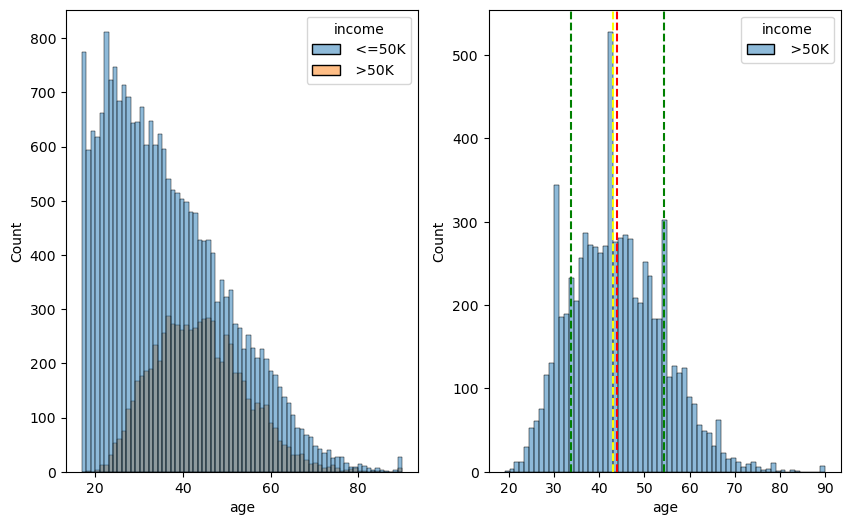

count    7508.000000
mean       43.959110
std        10.269633
min        19.000000
25%        36.000000
50%        43.000000
75%        51.000000
max        90.000000
Name: age, dtype: float64

In [4]:
hight_income = data[data['income'] == ' >50K']
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.histplot(
    data=data,
    x='age',
    hue='income',
    bins=data['age'].value_counts().count()
)
plt.subplot(1,2,2)
sns.histplot(
    data=hight_income,
    x='age',
    hue='income',
    bins=hight_income['age'].value_counts().count()
)
plt.axvline(
    hight_income['age'].mean(),
    color='red',
    linestyle = "--",
)
plt.axvline(
    hight_income['age'].median(),
    color='yellow',
    linestyle = "--",
)
plt.axvline(
    hight_income['age'].mean() + hight_income['age'].std(),
    color='green',
    linestyle = "--",
)
plt.axvline(
    hight_income['age'].mean() - hight_income['age'].std(),
    color='green',
    linestyle = "--",
)
plt.show()
hight_income['age'].describe()

- These charts show that most people who have an income >50K in the dataset are between 36 and 51 years old.
- The basic statistics show that the age range for people with an income >50K is between 19 and 90 years old, with an average of 43 years.

### Workclass:

,workclass,Total,income,Count,%
0,Private,22286,<=50K,17410,78.12
1,Private,22286,>50K,4876,21.88
2,Self-emp-not-inc,2499,<=50K,1785,71.43
3,Local-gov,2067,<=50K,1458,70.54
4,State-gov,1278,<=50K,934,73.08
5,Self-emp-not-inc,2499,>50K,714,28.57
6,Local-gov,2067,>50K,609,29.46
7,Self-emp-inc,1074,>50K,600,55.87
8,Federal-gov,943,<=50K,578,61.29
9,Self-emp-inc,1074,<=50K,474,44.13


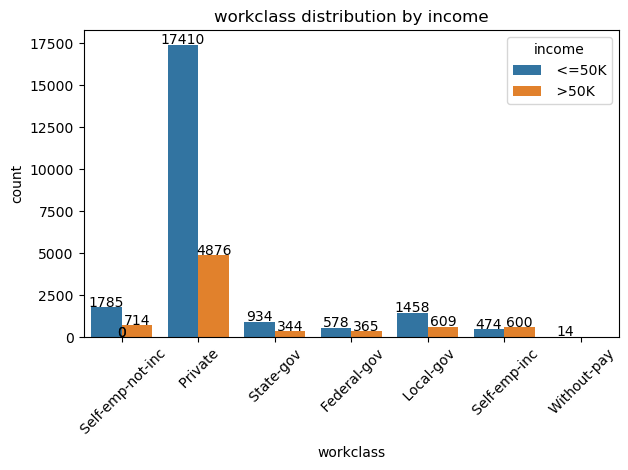

In [5]:
data.explorer.countplot_hue('workclass',hue='income',xtickrotation=45)
data.explorer.percentage_table('workclass',hue='income')

- This chart shows that most people with an income >50K are in the Private workclass, even though the proportion of people with a Private workclass and an income >50K is low, at 21.88%.
- The workclasses with the highest proportion of people earning >50K are Self-emp-inc at 55.87% and Federal-gov at 38%.
- People in the Without-pay workclass never have an income >50K.


### Fnlwgt:

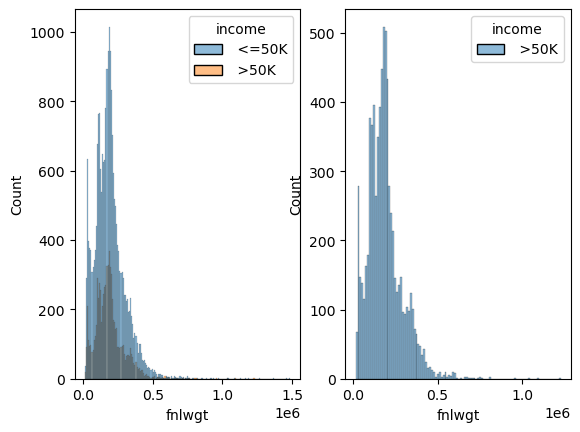

count    3.016100e+04
mean     1.897976e+05
std      1.056527e+05
min      1.376900e+04
25%      1.176280e+05
50%      1.784290e+05
75%      2.376300e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64
count    7.508000e+03
mean     1.881500e+05
std      1.028217e+05
min      1.487800e+04
25%      1.191005e+05
50%      1.761850e+05
75%      2.310660e+05
max      1.226583e+06
Name: fnlwgt, dtype: float64


In [6]:
plt.subplot(1,2,1)
sns.histplot(
    data=data,
    x='fnlwgt',
    hue='income'
)
plt.subplot(1,2,2)
sns.histplot(
    data=hight_income,
    x='fnlwgt',
    hue='income'
)
plt.show()
print(data.fnlwgt.describe())
print(hight_income.fnlwgt.describe())

- Total of records of the feature fnlwgt and those wich have an income >50K have a similar distribution and basic statistics it may indicate that this variable does not provide relevant information to differentiate between the groups.

### Education:

,education,Total,income,Count,%
0,HS-grad,9840,<=50K,8223,83.57
1,Some-college,6678,<=50K,5342,79.99
2,Bachelors,5043,<=50K,2917,57.84
3,Bachelors,5043,>50K,2126,42.16
4,HS-grad,9840,>50K,1617,16.43
5,Some-college,6678,>50K,1336,20.01
6,11th,1048,<=50K,989,94.37
7,Assoc-voc,1307,<=50K,963,73.68
8,Masters,1627,>50K,918,56.42
9,10th,820,<=50K,761,92.80


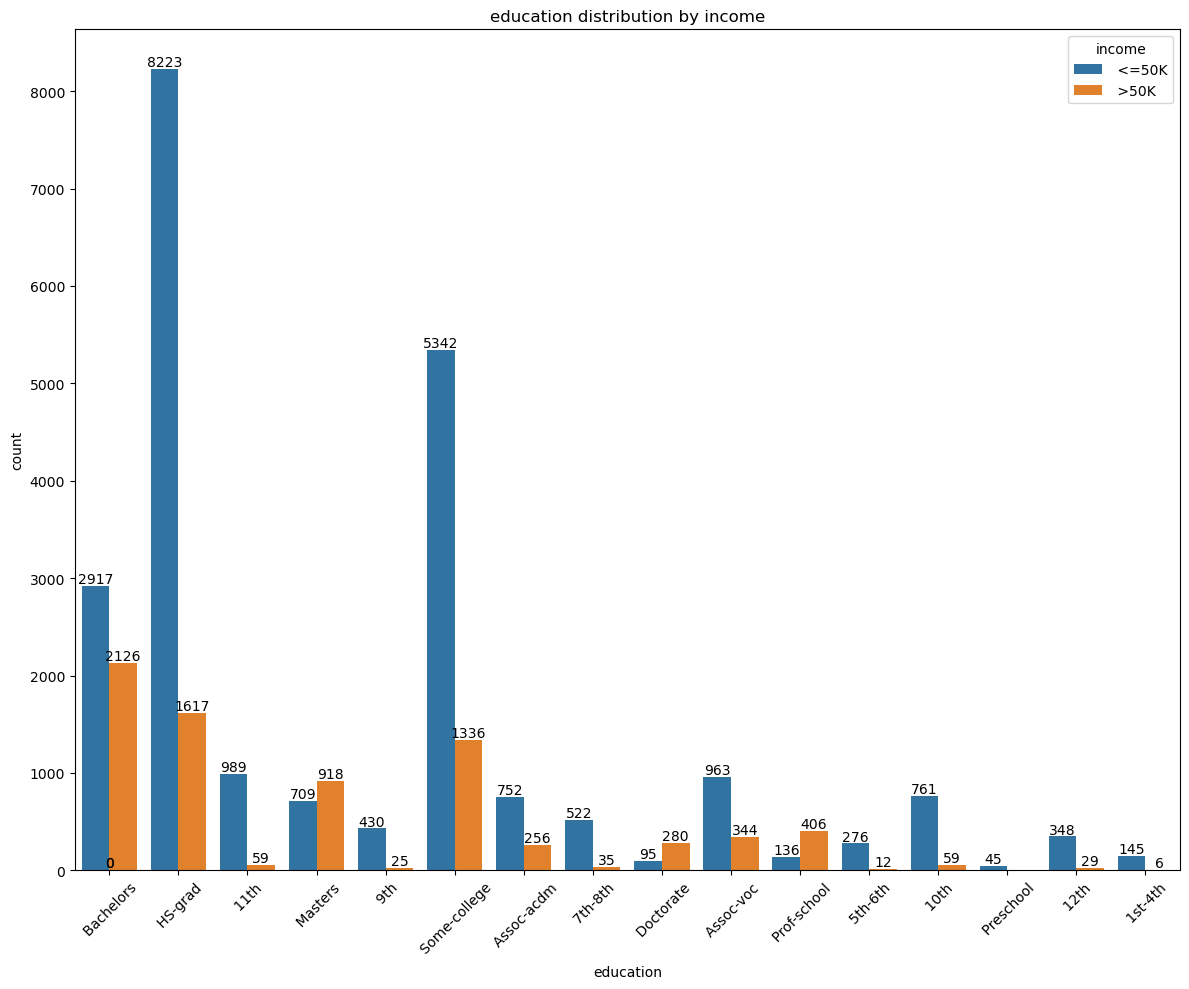

In [7]:
plt.figure(figsize=(12,10))
data.explorer.countplot_hue('education',hue='income',xtickrotation=45)
data.explorer.percentage_table('education',hue='income')

#### Analysis of Classes with the Highest Percentage of Records with Income >50K

In the analysis of the relationship between education level and income, the classes with the highest percentages of records earning over 50K have been identified. The following are the most notable classes:

| Education        | Total Records  | Income    | Count  | Percentage (%) |
|------------------|----------------|-----------|--------|----------------|
| Masters          | 1627           | >50K     | 918    | 56.42          |
| Prof-school      | 542            | >50K     | 406    | 74.91          |
| Doctorate        | 375            | >50K     | 280    | 74.67          |
| Bachelors        | 5043           | >50K     | 2126   | 42.16          |
| Some-college     | 6678           | >50K     | 1336   | 20.01          |
| Assoc-acdm       | 1008           | >50K     | 256    | 25.40          |
| Assoc-voc        | 1307           | >50K     | 344    | 26.32          |

#### Deductions

1. **Importance of Education Level**:
   - The data suggests that a higher level of education is associated with an income above 50K. The classes **Masters**, **Prof-school**, and **Doctorate** have significantly high percentages of people earning >50K, indicating that these educational levels may provide job and income advantages.

2. **Differences in Job Opportunities**:
   - The **Bachelors** class also shows a considerable percentage (42.16%), suggesting that having a bachelor's degree may be an important threshold for reaching higher incomes. However, it is evident that opportunities increase even more with higher education levels.

3. **Lower Proportions in Intermediate Education**:
   - Classes such as **Some-college** and **Assoc-acdm** have lower percentages of income >50K (20.01% and 25.40%, respectively), which could imply that although these education levels may provide certain skills, they are not sufficient to achieve significantly high incomes compared to those with graduate degrees.

4. **Implications for Education and Training**:
   - These findings suggest that investing in higher education and specializations may be crucial for improving income opportunities in the population. Educational and training policies should focus on providing access and support for higher education levels.

In conclusion, the analysis of classes with the highest percentages of income >50K reveals the importance of education level in job and economic opportunities, providing valuable insights for policy formulation and professional development strategies.


### Education_num:

,education_num,Total,income,Count,%
0,9,9840,<=50K,8223,83.57
1,10,6678,<=50K,5342,79.99
2,13,5043,<=50K,2917,57.84
3,13,5043,>50K,2126,42.16
4,9,9840,>50K,1617,16.43
5,10,6678,>50K,1336,20.01
6,7,1048,<=50K,989,94.37
7,11,1307,<=50K,963,73.68
8,14,1627,>50K,918,56.42
9,6,820,<=50K,761,92.80


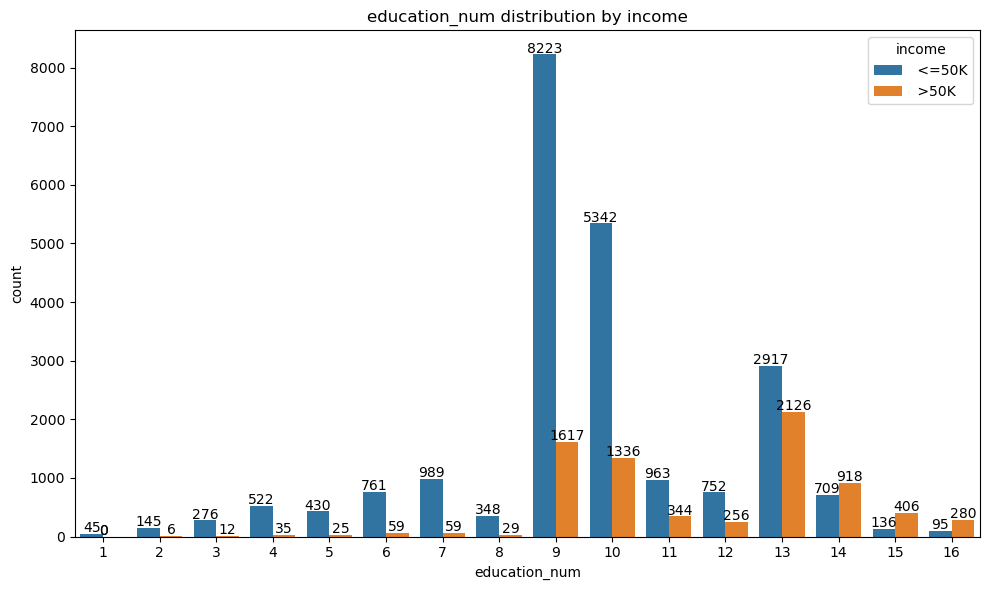

In [8]:
plt.figure(figsize=(10,6))
data.explorer.countplot_hue('education_num','income')
data.explorer.percentage_table('education_num','income')

#### Analysis of Classes with the Highest Percentage of Records with Income >50K (education_num)

In the analysis of the relationship between years of education (`education_num`) and income, the classes with the highest percentages of records earning over 50K have been identified. The following are the most notable classes:

| Years of Education | Total Records  | Income    | Count  | Percentage (%) |
|--------------------|----------------|-----------|--------|----------------|
| 14                 | 1627           | >50K     | 918    | 56.42          |
| 15                 | 542            | >50K     | 406    | 74.91          |
| 16                 | 375            | >50K     | 280    | 74.67          |
| 13                 | 5043           | >50K     | 2126   | 42.16          |
| 10                 | 6678           | >50K     | 1336   | 20.01          |
| 11                 | 1307           | >50K     | 344    | 26.32          |

#### Deductions

1. **Direct Relationship Between Years of Education and Income**:
   - The data suggest that as the number of years of education increases, the likelihood of having income above 50K also increases. The classes with 14, 15, and 16 years of education have high percentages of individuals earning >50K, indicating that a longer education duration is associated with better job opportunities.

2. **Importance of a College Degree**:
   - The class with 13 years of education, typically representing those with a bachelor's degree, also shows a significant percentage (42.16%). This reinforces the idea that completing at least a college degree may be crucial for accessing higher incomes.

3. **Performance of Classes with Fewer Years of Education**:
   - Classes with 10 and 11 years of education have lower percentages of income >50K (20.01% and 26.32%, respectively). This may imply that job opportunities for those with fewer years of education are more limited, affecting their ability to achieve high incomes.

4. **Implications for Educational Policies**:
   - These findings suggest that investing in education, especially in programs that promote the continuation of studies beyond secondary education, may be essential for improving the economic opportunities of the population.

In conclusion, the analysis of classes with the highest percentages of income >50K in relation to years of education highlights the importance of education as a determining factor in job opportunities and income, providing valuable insights for educational policy formulation and professional development.


### Marital Status:

,marital_status,Total,income,Count,%
0,Never-married,9725,<=50K,9255,95.17
1,Married-civ-spouse,14065,<=50K,7666,54.50
2,Married-civ-spouse,14065,>50K,6399,45.50
3,Divorced,4214,<=50K,3762,89.27
4,Separated,939,<=50K,873,92.97
5,Widowed,827,<=50K,747,90.33
6,Never-married,9725,>50K,470,4.83
7,Divorced,4214,>50K,452,10.73
8,Married-spouse-absent,370,<=50K,339,91.62
9,Widowed,827,>50K,80,9.67


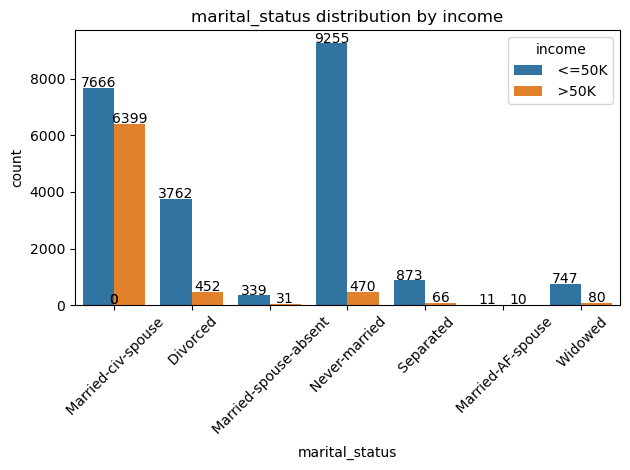

In [9]:
data.explorer.countplot_hue('marital_status','income',xtickrotation=45)
data.explorer.percentage_table('marital_status','income')

#### Analysis of Classes with the Highest Percentage of Records with Income >50K (marital_status)

In the analysis of the relationship between marital status and income, the classes with the highest percentages of records earning over 50K have been identified. The following are the most notable classes:

| Marital Status              | Total Records | Income    | Count | Percentage (%) |
|-----------------------------|---------------|-----------|-------|----------------|
| Married-civ-spouse          | 14065         | >50K      | 6399  | 45.50          |
| Divorced                    | 4214          | >50K      | 452   | 10.73          |
| Widowed                     | 827           | >50K      | 80    | 9.67           |
| Separated                   | 939           | >50K      | 66    | 7.03           |
| Married-spouse-absent       | 370           | >50K      | 31    | 8.38           |
| Married-AF-spouse           | 21            | >50K      | 10    | 47.62          |

##### Deductions

1. **Impact of Marital Status on Income**:
   - The data indicate that individuals who are married (specifically those classified as **Married-civ-spouse**) have a higher likelihood of earning over 50K, with 45.50% of this group exceeding the income threshold. This suggests that marriage may provide economic benefits and stability.

2. **Significantly Lower Percentages for Other Statuses**:
   - The **Divorced** (10.73%), **Widowed** (9.67%), and **Separated** (7.03%) categories show significantly lower percentages of individuals earning >50K. This may indicate that these marital statuses are associated with more financial challenges compared to those who are married.

3. **Never-Married Category**:
   - The **Never-married** category has a very low percentage of individuals with income >50K (4.83%), which could imply that being single is associated with limited access to higher-paying jobs or financial resources.

4. **Implications for Support Programs**:
   - These findings suggest the importance of considering marital status when developing support programs and policies aimed at improving economic opportunities. Programs tailored to assist single, divorced, or widowed individuals may be necessary to address the financial disparities observed.

In conclusion, the analysis of marital status in relation to income highlights the significant impact that marital relationships can have on economic outcomes, providing valuable insights for both policy makers and social programs aimed at enhancing financial stability for various demographic groups.


### Occupation:

,occupation,Total,income,Count,%
0,Adm-clerical,3720,<=50K,3222,86.61
1,Craft-repair,4030,<=50K,3122,77.47
2,Other-service,3212,<=50K,3080,95.89
3,Sales,3584,<=50K,2614,72.94
4,Prof-specialty,4038,<=50K,2227,55.15
5,Exec-managerial,3992,<=50K,2055,51.48
6,Exec-managerial,3992,>50K,1937,48.52
7,Prof-specialty,4038,>50K,1811,44.85
8,Machine-op-inspct,1966,<=50K,1721,87.54
9,Handlers-cleaners,1350,<=50K,1267,93.85


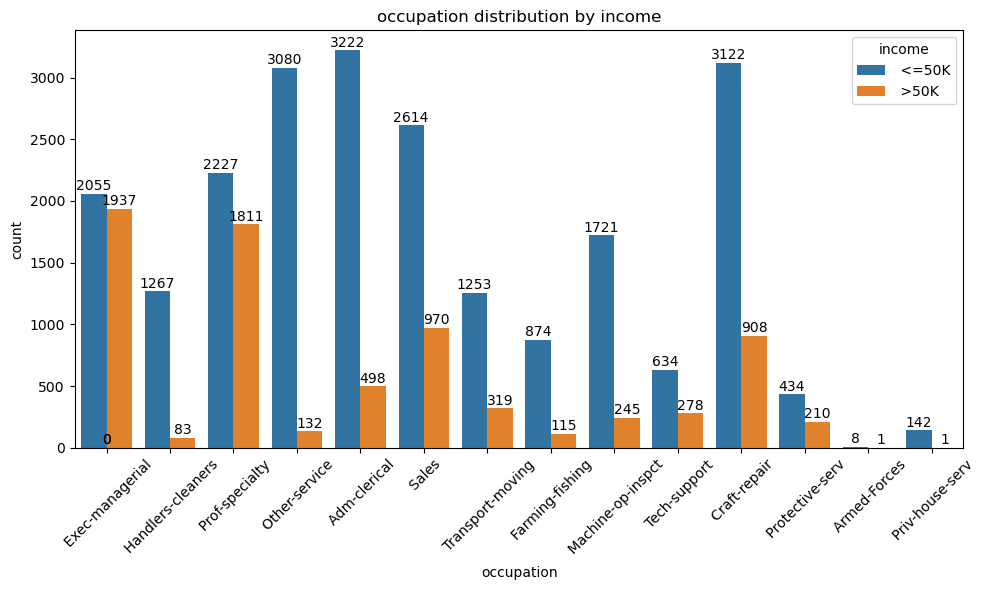

In [10]:
plt.figure(figsize=(10,6))
data.explorer.countplot_hue('occupation','income',xtickrotation=45)
data.explorer.percentage_table('occupation','income')

# Analysis of Classes with the Highest Percentage of Records with Income >50K (Occupation)

In the analysis of the relationship between occupation and income, the classes with the highest percentages of records earning over 50K have been identified. The following are the most notable classes, ordered by percentage from highest to lowest:

| Occupation                | Total Records | Income    | Count | Percentage (%) |
|---------------------------|---------------|-----------|-------|----------------|
| Exec-managerial           | 3992          | >50K      | 1937  | 48.52          |
| Prof-specialty            | 4038          | >50K      | 1811  | 44.85          |
| Protective-serv           | 644           | >50K      | 210   | 32.61          |
| Tech-support              | 912           | >50K      | 278   | 30.48          |
| Sales                     | 3584          | >50K      | 970   | 27.06          |
| Craft-repair              | 4030          | >50K      | 908   | 22.53          |

## Deductions

1. **High Earnings in Managerial and Professional Roles**:
   - The data indicate that individuals in managerial roles (**Exec-managerial**) have a higher likelihood of earning over 50K, with 48.52% of this group exceeding the income threshold. Similarly, those in professional specialties (**Prof-specialty**) also show a substantial percentage (44.85%), suggesting that these occupations tend to provide higher wages and greater economic stability.

2. **Technical and Protective Roles**:
   - **Protective-serv** occupations display a strong percentage (32.61%), suggesting that jobs in this category may offer decent wages and job security. Additionally, **Tech-support** roles show a notable percentage of income >50K (30.48%), indicating that individuals in this field can achieve competitive salaries, especially as technology continues to grow in importance.

3. **Sales Occupations**:
   - The **Sales** occupation shows a percentage of individuals earning over 50K (27.06%). This indicates that while some sales roles may offer high commissions, many positions in this field do not consistently yield salaries exceeding the income threshold.

4. **Craft and Repair Occupations**:
   - While **Craft-repair** roles have a percentage of income >50K (22.53%), they represent a substantial portion of the overall population in this category, indicating that skilled trades can offer competitive salaries but may not be as common among higher earners as previously thought.

In conclusion, the analysis of occupations in relation to income highlights the significant disparities in earnings across different job categories. This provides valuable insights for both job seekers and policymakers looking to improve economic opportunities for various occupational groups.


## Race:

,race,Total,income,Count,%
0,White,25932,<=50K,19093,73.63
1,White,25932,>50K,6839,26.37
2,Black,2817,<=50K,2451,87.01
3,Asian-Pac-Islander,895,<=50K,647,72.29
4,Black,2817,>50K,366,12.99
5,Amer-Indian-Eskimo,286,<=50K,252,88.11
6,Asian-Pac-Islander,895,>50K,248,27.71
7,Other,231,<=50K,210,90.91
8,Amer-Indian-Eskimo,286,>50K,34,11.89
9,Other,231,>50K,21,9.09


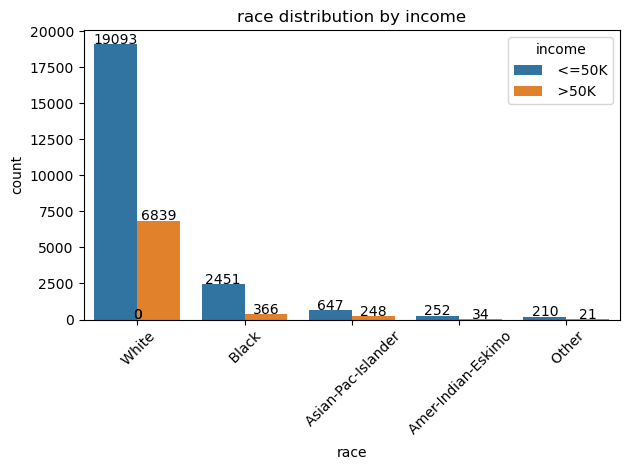

In [11]:
data.explorer.countplot_hue('race','income',xtickrotation=45)
data.explorer.percentage_table('race','income')


#### Analysis of Classes with the Highest Percentage of Records with Income >50K (Race)

In the analysis of the relationship between race and income, the classes with the highest percentages of records earning over 50K have been identified. The following are the most notable classes, ordered by percentage from highest to lowest:

| Race                     | Total Records | Income    | Count | Percentage (%) |
|--------------------------|---------------|-----------|-------|----------------|
| Asian-Pac-Islander       | 895           | >50K      | 248   | 27.71          |
| White                    | 25932         | >50K      | 6839  | 26.37          |
| Black                    | 2817          | >50K      | 366   | 12.99          |
| Amer-Indian-Eskimo      | 286           | >50K      | 34    | 11.89          |
| Other                    | 231           | >50K      | 21    | 9.09           |

#### Deductions

1. **Higher Earnings Among Asian-Pac-Islander**:
   - The **Asian-Pac-Islander** group exhibits the highest percentage of income >50K (27.71%). This could reflect educational or occupational advantages compared to other racial groups.

2. **Significant Portion of White Earnings**:
   - The **White** demographic shows a substantial portion of individuals earning over 50K (26.37%), indicating broader access to higher-paying job opportunities.

3. **Income Disparities in Black Communities**:
   - The **Black** demographic shows a percentage of income >50K at 12.99%. This indicates significant room for improvement in economic opportunities and suggests that further research may be needed to understand the barriers to higher earnings within this community.

4. **Economic Challenges for Native Americans**:
   - **Amer-Indian-Eskimo** individuals have a lower percentage of income >50K (11.89%), indicating that this group may face economic challenges, as represented by the smaller portion of higher earners.

5. **Limited Income Among Other Races**:
   - The **Other** category, although small in total records, shows a percentage of 9.09% of individuals earning over 50K. This suggests there may be unique opportunities or circumstances leading to higher incomes for this demographic.

In conclusion, the analysis of race in relation to income highlights important disparities in earnings among different racial groups. These findings can inform efforts to improve economic opportunities for historically underserved communities.


### Gender:

,gender,Total,income,Count,%
0,Male,20379,<=50K,13983,68.61
1,Female,9782,<=50K,8670,88.63
2,Male,20379,>50K,6396,31.39
3,Female,9782,>50K,1112,11.37


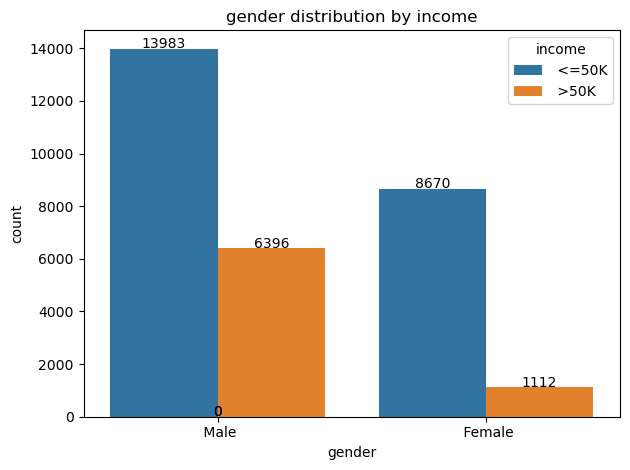

In [12]:
data.explorer.countplot_hue('gender','income')
data.explorer.percentage_table('gender','income')

#### Analysis of Classes with the Highest Percentage of Records with Income >50K (Gender)

The analysis of the relationship between gender and income has identified the classes with the highest percentages of records earning over 50K. The following are the notable classes, ordered by percentage from highest to lowest:

| Gender | Total Records | Income | Count | Percentage (%) |
|--------|---------------|--------|-------|----------------|
| Male   | 20379         | >50K   | 6396  | 31.39          |
| Female | 9782          | >50K   | 1112  | 11.37          |

#### Deductions

1. **Higher Earnings Among Males**:
   - The **Male** group shows a higher percentage of individuals earning over 50K (31.39%). This suggests that men may have more access to higher-paying jobs or positions compared to their female counterparts.

2. **Lower Earnings Among Females**:
   - The **Female** demographic has a percentage of income >50K at 11.37%. This indicates significant economic disparities and challenges faced by women in attaining higher salaries, suggesting the need for continued efforts to promote gender equality in the workforce.

3. **Overall Income Distribution**:
   - The overall analysis indicates a larger portion of males in higher income brackets compared to females, pointing to potential systemic barriers or biases affecting women's earning potential.

In conclusion, the analysis of gender in relation to income highlights notable disparities in earnings between males and females. These findings can inform strategies aimed at improving economic opportunities and reducing gender-based income gaps.


### Capital_gain & Capital_loss:

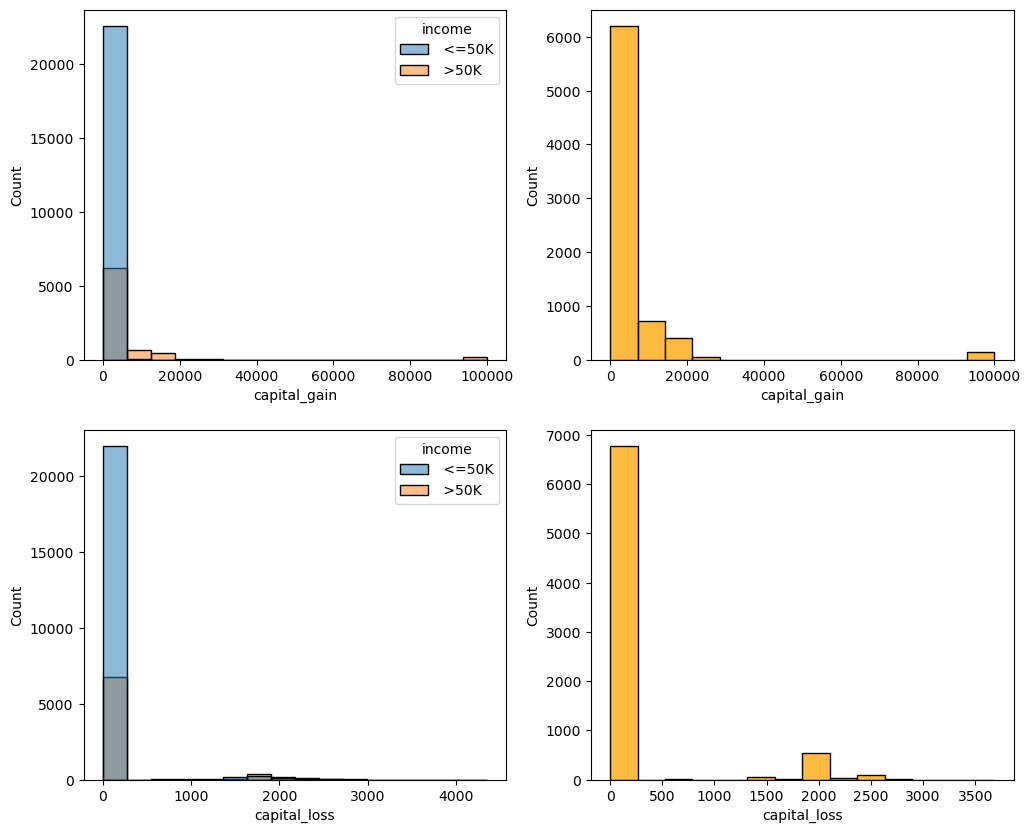

In [13]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.histplot(
    data=data,
    x='capital_gain',
    hue='income'
)
plt.subplot(2,2,2)
sns.histplot(
    data=hight_income,
    x='capital_gain',
    color='orange'
)
plt.subplot(2,2,3)
sns.histplot(
    data=data,
    x='capital_loss',
    hue='income'
)
plt.subplot(2,2,4)
sns.histplot(
    data=hight_income,
    x='capital_loss',
    color='orange'
)
plt.show()

- Considering that most individuals in the dataset have capital gains and losses equal to 0, which indicates they do not engage in any form of investments, the proportion of people who do not invest is significant. Therefore, treating records of individuals with investments as outliers is justified. Additionally, the distribution of individuals who invest and have incomes >50K is similar to the overall distribution of records. This may suggest that this feature is not a good predictor for the target variable (income).

### Hours per Week:

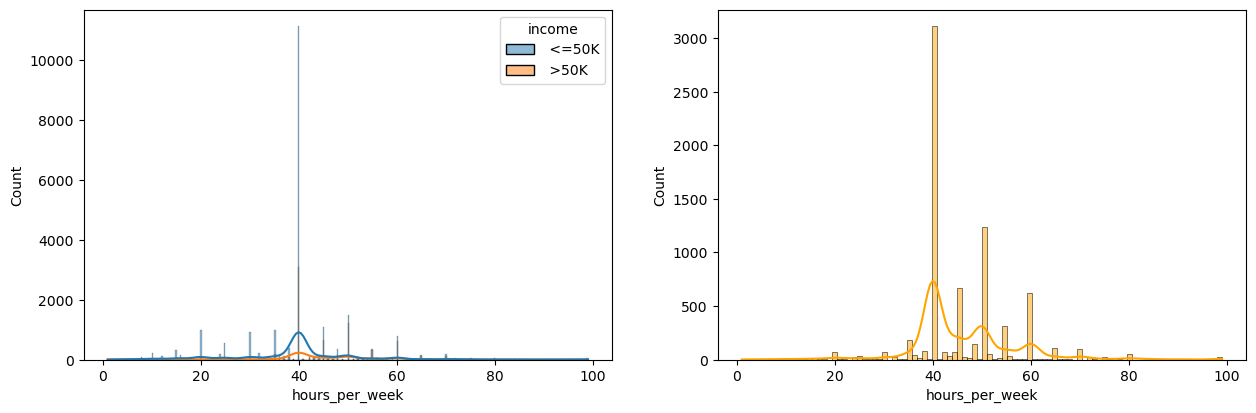

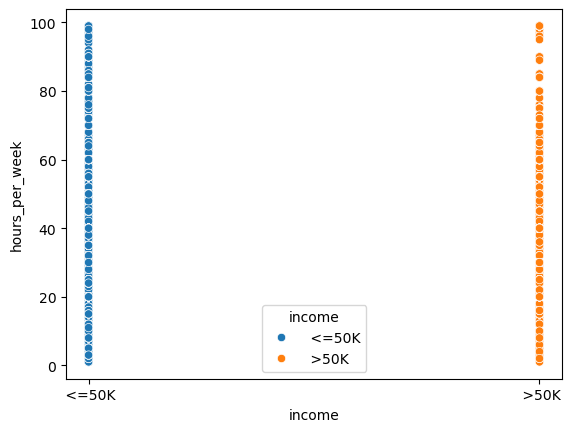

,hours_per_week,Total,income,Count,%
147,61,2,>50K,2,100.00
132,67,4,>50K,3,75.00
137,76,3,>50K,2,66.67
172,89,2,>50K,1,50.00
156,95,2,>50K,1,50.00
170,73,2,>50K,1,50.00
150,97,2,>50K,1,50.00
16,55,672,>50K,312,46.43
3,50,2718,>50K,1237,45.51
10,60,1405,>50K,624,44.41


In [14]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(
    data=data,
    x='hours_per_week',
    hue='income',
    kde=True
)
plt.subplot(2,2,2)
sns.histplot(
    data=hight_income,
    x='hours_per_week',
    color='orange',
    kde=True
)
plt.show()
sns.scatterplot(
    data=data,
    x='income',
    y='hours_per_week',
    hue='income'
)
plt.show()
percentage_table = data.explorer.percentage_table('hours_per_week','income')
percentage_table[percentage_table['income'] == ' >50K'].sort_values(by='%',ascending=False).head(25)

# Analysis of the Relationship between Record Distributions and Income

- **Similarity in Distributions**: 
  - The distributions of total records and records with income >50K are comparable, suggesting that, on its own, this variable may not show significant differences between income groups.

- **Implications for Predictive Modeling**: 
  - Although this variable on its own may not be a strong predictor of income, its combination with other variables could provide better predictive power.



## Native Country:

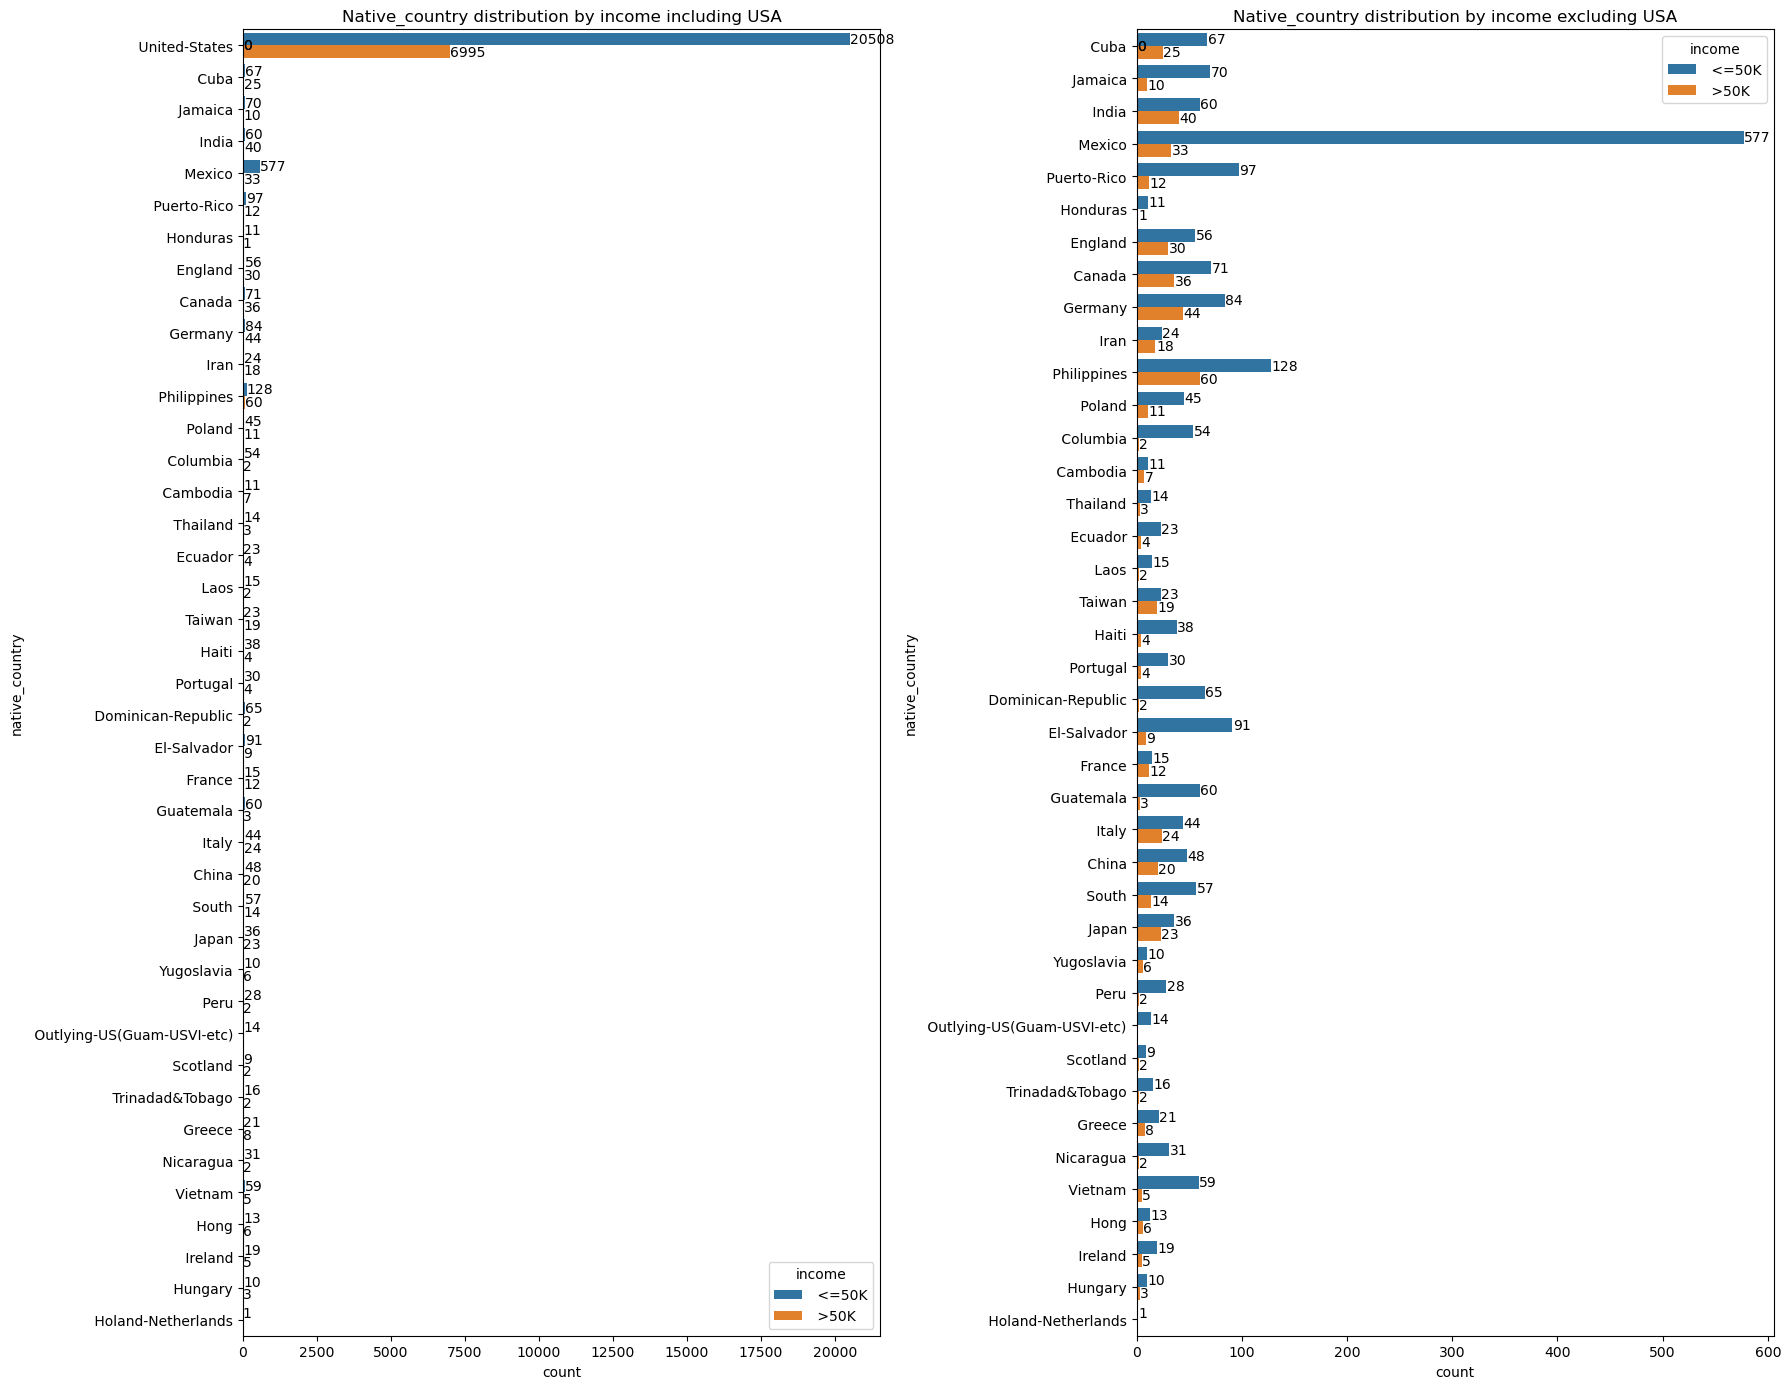

In [ ]:
# Plotting native_country distribution 
plt.figure(figsize=(18,14))
# Including USA
plt.subplot(1,2,1)
data.explorer.countplot_hue('native_country', hue='income', orient='h')
plt.title('Native_country distribution by income including USA')

# Excluding USA
plt.subplot(1,2,2)
data[data['native_country'] != ' United-States'].explorer.countplot_hue('native_country', hue='income',orient='h')
plt.title('Native_country distribution by income excluding USA')
percentage_table = data.explorer.percentage_table('native_country','income')
percentage_table[percentage_table['income'] == ' >50K'].sort_values(by='%',ascending=False).head(10)
plt.show()

- The countplot shows a larger number of records with Native_Country = 'United-States'; however, this group is not in the top 10 countries with the highest percentage of records earning >50K.
- The largest group of records earning >50K comes from the United States, with 6,995 records (25.43%).

In [16]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


# Conclusions

In this second exploration, several key findings have been observed:

- **Native Country Distribution**:
  - A significant portion of the dataset originates from the United States. However, the U.S. is not among the top 10 countries with the highest percentage of individuals earning >50K.

- **Work Hours and Income**:
  - There is no clear or consistent relationship between weekly hours worked and income. Individuals working both fewer and more hours can be found in both income categories.

- **Variable as a Predictor**:
  - While some variables, such as native country and hours worked, do not show strong predictive power for income on their own, their combination with other variables could offer better insights.

- **Income Distribution**:
  - The dataset presents a skewed distribution, with a larger proportion of individuals earning ≤50K. This imbalance could impact model predictions and will need to be addressed in further analysis.
